In [1]:
#from google.colab import files
#uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [3]:
import pandas as pd
# loading dataset
df = pd.read_csv("/content/credit_risk_dataset.csv")
df = df.dropna()

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,2,1.0,0,2,5800,13.16,0,0.11,1,30
32577,54,120000,2,4.0,0,3,17625,7.49,0,0.15,1,19
32578,65,76000,0,3.0,4,1,35000,10.99,1,0.46,1,28
32579,56,150000,2,5.0,0,1,15000,11.48,0,0.10,1,26
32580,66,42000,0,2.0,2,1,6475,9.99,0,0.15,1,30


In [10]:
dtype = df.dtypes
print(dtype)

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
dtype: object


In [11]:
df.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,0.910538,4.788672,2.336406,1.872826,9656.493121,11.039867,0.216600,0.169488,0.821810,5.793736
std,6.310441,6.235645e+04,0.961943,4.154627,1.680249,1.142604,6329.683361,3.229372,0.411935,0.106393,0.382679,4.038483
min,20.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,0.000000,2.000000,1.000000,1.000000,5000.000000,7.900000,0.000000,0.090000,1.000000,3.000000
50%,26.000000,5.595600e+04,0.000000,4.000000,2.000000,2.000000,8000.000000,10.990000,0.000000,0.150000,1.000000,4.000000
75%,30.000000,8.000000e+04,2.000000,7.000000,4.000000,3.000000,12500.000000,13.480000,0.000000,0.230000,1.000000,8.000000
max,144.000000,6.000000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,1.000000,0.830000,1.000000,30.000000


In [7]:
df.person_home_ownership = pd.factorize(df.person_home_ownership)[0]
df.loan_intent = pd.factorize(df.loan_intent)[0]
df.loan_grade = pd.factorize(df.loan_grade)[0]
df.cb_person_default_on_file = pd.factorize(df.cb_person_default_on_file)[0]

# Selecting Feature

In [13]:
#split dataset in features and target variable
X = df.drop(['loan_status'], axis=1)
y = df.loan_status

# Splitting Data

In [19]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

# Logistic Regression Model Development and Prediction

In [20]:
# import the class
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [29]:
# evaluating model performance metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
confusion_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

In [22]:
print(f"Accuracy: {accuracy_logreg}")
print(f"Confusion Matrix:\n{confusion_logreg}")
print(f"Classification Report:\n{classification_rep_logreg}")

Accuracy: 0.8077379705286682
Confusion Matrix:
[[11044   178]
 [ 2575   522]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     11222
           1       0.75      0.17      0.27      3097

    accuracy                           0.81     14319
   macro avg       0.78      0.58      0.58     14319
weighted avg       0.80      0.81      0.76     14319



# ROC Curve

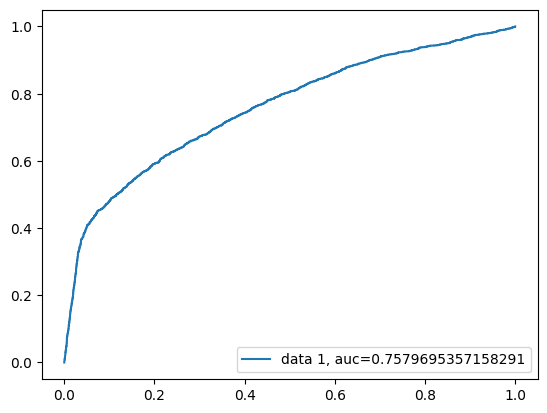

In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Linear Discriminant Analysis

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# create the lda model
model = LinearDiscriminantAnalysis()
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

In [31]:
# evaluating model performance metrics
accuracy_clf = accuracy_score(y_test, y_pred_clf)
confusion_clf = confusion_matrix(y_test, y_pred_clf)
classification_rep_clf = classification_report(y_test, y_pred_clf)

In [33]:
print(f"Accuracy: {accuracy_clf}")
print(f"Confusion Matrix:\n{confusion_clf}")
print(f"Classification Report:\n{classification_rep_clf}")

Accuracy: 0.8382568615126754
Confusion Matrix:
[[10640   582]
 [ 1734  1363]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11222
           1       0.70      0.44      0.54      3097

    accuracy                           0.84     14319
   macro avg       0.78      0.69      0.72     14319
weighted avg       0.83      0.84      0.82     14319



# ROC Curve

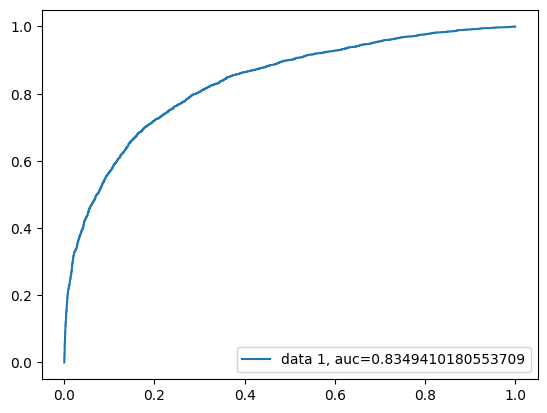

In [36]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()